# Clustering
- 비지도 학습의 한 분야

### k-means
- 다른 군집 알고리즘에 비해 계산 효율성이 높아 인기가 많다.
- 클러스터 개수를 사전에 지정해야 하는 단점이 있다. 고차원 데이터셋에서는 클러스터 개수가 명확하지 않다.
- 클러스터가 중첩되지 않고 계층적이지 않다.
- prototype-based clustering에 속한다.
- 연속적인 특성에서는 centroid (평균)
- 범주형 특성에서는 medoid (가장 대표되는 포인트)

In [1]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples = 150, n_features = 2, centers = 3,
                  cluster_std = 0.5, shuffle = True, random_state = 0)

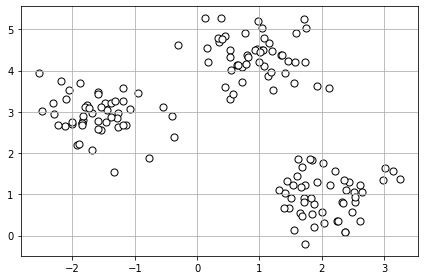

In [2]:
import matplotlib.pyplot as plt

plt.scatter(X[:,0], X[:, 1], c = 'white', marker = 'o',
            edgecolor = 'black', s=50)
plt.grid()
plt.tight_layout()
plt.show()

### k-means algorithm steps
1. 샘플 포인트에서 랜덤하게 k개의 centroid를 초기 클러스터 중심으로 선택
2. 각 샘플을 가장 가까운 센트로이드 $\mu_{j},\; j \in (1, ..., k)$에 할당
3. 할당된 샘플들의 중심으로 센트로이드를 이동
4. 클러스터 할당이 변하지 않거나, 사용자가 지정한 허용 오차나 최대 반복 횟수에 도달할 때까지 단계 2, 3 반복  


- 샘플을 클러스터로 묶는 데 사용되는 거리는 m 차원 공간에 있는 두 포인트 간의 유클리디안 거리의 제곱이다
- $d(x, y)^{2} = \sum_{j=1}^{m}(x_{j}- y_{j})^{2}=||x-y||_{2}^{2}$
- 위의 유클리디안 거리 지표를 기반으로 SSE를 최소화할 수 있다.
- $SSE = \sum_{i=1}^{n} \sum_{j=1}^{k}w^{(i, j)}||x_{i}-\mu_{j}||_{2}^{2}$
- $\mu = centroid$
- 샘플 x가 클러스터 j 안에 있다면 w(i, j) = 1, 아니면 w(i, j) = 0

- n_clusters : 클러스터 개수를 사전 지정 -> k-means의 한계점 시사
- n_init : 알고리즘을 각기 랜덤한 centroid에서 독립적으로 n_init번 실행하여 가장 낮은 SSE 찾는다.
- 문제점 : 하나 이상의 클러스터가 비어있을 수 있다.

In [3]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, init = 'random', n_init = 10,
            max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

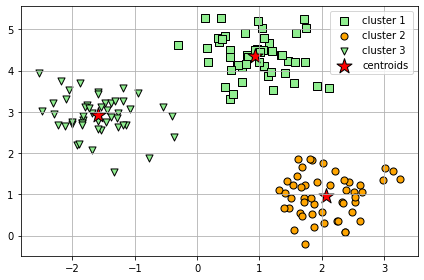

In [4]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50, c = 'lightgreen',
            marker = 's', edgecolor = 'black',
            label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50, c = 'orange',
            marker = 'o', edgecolor = 'black',
            label = 'cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s = 50, c = 'lightgreen',
            marker = 'v', edgecolor = 'black',
            label = 'cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            c = 'red',
            s = 250, marker = '*', edgecolor = 'black',
            label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

# k-means++
- 초기 센트로이드가 서로 멀리 떨어지도록 위치시키는 것

### 과정
1. 선택한 k개의 센트로이드를 저장할 빈 집합 M을 초기화
2. 입력 샘플에서 첫 번째 센트로이드 mu를 랜덤하게 선택하고 M에 할당
3. M에 있지 않은 각 샘플에 대해 M에 있는 센트로이드까지 최소 제곱거리를 찾는다.
4. 가중치가 적용된 확률 분포 $\frac{d(\mu_{p}, M)^{2}}{\sum_{i}d(x_{i}, M)^{2}}$를 사용하여 $\mu_{p}$를 랜덤하게 선택
5. k개의 센트로이드를 선택할 때까지 단계 2, 3 반복
6. 기본 k-means 수행

In [5]:
from sklearn.cluster import KMeans

km = KMeans(n_clusters = 3, init = 'k-means++', n_init = 10,
            max_iter = 300, tol = 1e-04, random_state = 0)
y_km = km.fit_predict(X)

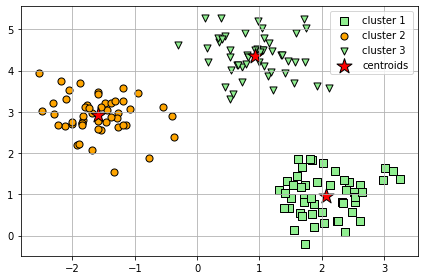

In [6]:
plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50, c = 'lightgreen',
            marker = 's', edgecolor = 'black',
            label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50, c = 'orange',
            marker = 'o', edgecolor = 'black',
            label = 'cluster 2')
plt.scatter(X[y_km == 2, 0],
            X[y_km == 2, 1],
            s = 50, c = 'lightgreen',
            marker = 'v', edgecolor = 'black',
            label = 'cluster 3')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            c = 'red',
            s = 250, marker = '*', edgecolor = 'black',
            label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

# hard clustering vs. soft clustering
- hard clustering : 데이터셋의 샘플이 정확히 하나의 클러스터에 할당되는 알고리즘 (k-means) sample 하나 당 하나의 cluster
- soft clustering : 샘플을 하나 이상의 클러스터에 할당 (Fuzzy C-means, FCM)

### FCM (Fuzzy C-means)
- 샘플이 각 클러스터에 속할 확률로 바꾼다.
- k-means -> $\begin{bmatrix} \mu_{1} \rightarrow 0 \\ \mu_{2} \rightarrow 1 \\ \mu_{3} \rightarrow 0 \end{bmatrix}$
- FCM -> $\begin{bmatrix} \mu_{1} \rightarrow 0.10 \\ \mu_{2} \rightarrow 0.85 \\ \mu_{3} \rightarrow 0.05 \end{bmatrix}$

#### FCM 과정
1. 센트로이드 개수 k를 지정하고 랜덤하게 각 포인트에 대해 클러스터 확률 할당
2. 클러스터 센트로이드 계산
3. 각 샘플에 대해 클러스터 소속 확률 업데이트
4. 클러스터 확률이 변하지 않거나 사용자가 지정한 허용오차나 최대 반복 횟수에 도달할 때까지 2, 3반복

### FCM 목적함수
- $J_{m} = \sum_{i=1}^{n} \sum_{j=1}^{k}w^{(i, j)}||x_{i}-\mu_{j}||_{2}^{2}$
- $w^{(i, j)}$가 k-means의 0, 1의 이진값이 아니라 소속 확률을 나타내는 실수값이다.
- fuzziness coefficient(퍼지계수)라고 하는 지수 m을 포함하는데 m은 1보다 크거나 같으며 (일반적으로 2) 클수록 w가 작아져 더 복잡한 클러스터를 만든다.
- $w^{(i, j)} = [\sum_{p=1}^{k}(\frac{||X_{i}-\mu_{j}||_{2}}{||X_{i}-\mu_{p}||_{2}})^{\frac{2}{m-1}}]^{-1}$
- $\mu_{j} = \frac{\sum_{i=1}^{n}w^{m(i, j)}x_{i}}{\sum_{i=1}^{n}w^{m(i, j)}}$

실제로는 k평균과 FCM이 매우 비슷한 군집결과를 만든다고 알려져 있다.

## 최적의 클러스터 개수 찾기
- 지도 학습처럼 클래스 레이블이 없기 때문에 성능 비교를 위해 SSE를 사용한다.

In [7]:
print('SSE: ', round(km.inertia_, 2))

SSE:  72.48


##### elbow method
- k가 증가하면 왜곡은 줄어든다. 이때, 빠르게 증가하는 지점의 k값을 찾는 것이다.

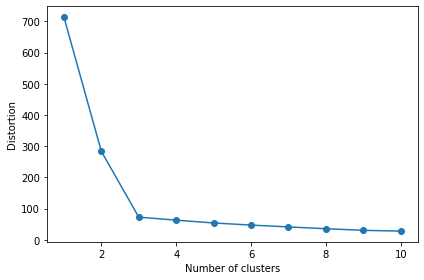

In [8]:
distortions = []
for i in range(1, 11):
    km = KMeans(n_clusters = i,
                init = 'k-means++',
                n_init = 10,
                max_iter = 300,
                random_state = 0)
    km.fit(X)
    distortions.append(km.inertia_)
plt.plot(range(1, 11), distortions, marker = 'o')
plt.xlabel('Number of clusters')
plt.ylabel('Distortion')
plt.tight_layout()
plt.show()

##### silhouette analysis
- 클러스터 내 샘플들이 얼마나 조밀하게 모여 있는지 측정하는 그래프 도구
- 원형 클러스터일 때 사용
##### 과정
1. 샘플 xi와 동일한 클러스터 내 모든 다른 포인트 사이의 거리를 평균하여 클러스터 응집력 ai를 계산
2. 샘플 xi와 가장 가까운 클러스터의 모든 샘플 간 평균 거리로 최근접 클러스터의 클러스터 분리도 bi를 계산
3. 클러스터 응집력과 분리도 사이의 차이를 둘 중 큰 값으로 나누어 실루엣 si를 다음과 같이 계산
- $s_{i} = \frac{b_{i}-a_{i}}{max(b_{i}, a_{i})}$
- 실루엣 계수는 -1과 1 사이 값
- 응집력과 분리도가 같으면 실루엣 계수는 0
- b > a 이면 이상적인 실루잇 계수 1에 가까움
- b는 샘플이 다른 클러스터와 얼마나 다른지 나타냄
- a는 클러스터 내 다른 샘플과 얼마나 비슷한지 나타냄

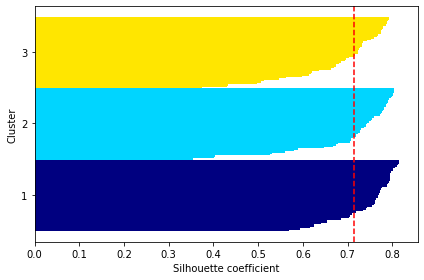

In [9]:
km = KMeans(n_clusters = 3,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(X)

import numpy as np
from matplotlib import cm
from sklearn.metrics import silhouette_samples

cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0

yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km ==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

### k = 2

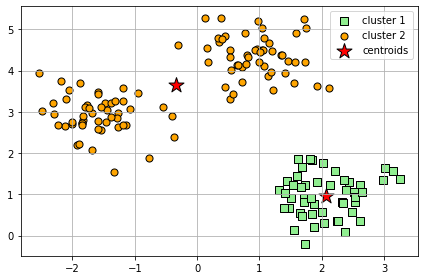

In [10]:
km = KMeans(n_clusters = 2,
            init = 'k-means++',
            n_init = 10,
            max_iter = 300,
            tol = 1e-04,
            random_state = 0)
y_km = km.fit_predict(X)

plt.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 50, c = 'lightgreen',
            marker = 's', edgecolor = 'black',
            label = 'cluster 1')
plt.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 50, c = 'orange',
            marker = 'o', edgecolor = 'black',
            label = 'cluster 2')
plt.scatter(km.cluster_centers_[:, 0],
            km.cluster_centers_[:, 1],
            c = 'red',
            s = 250, marker = '*', edgecolor = 'black',
            label = 'centroids')
plt.legend(scatterpoints = 1)
plt.grid()
plt.tight_layout()
plt.show()

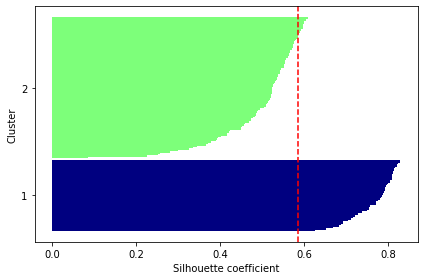

In [11]:
cluster_labels = np.unique(y_km)
n_clusters = cluster_labels.shape[0]
silhouette_vals = silhouette_samples(X, y_km, metric = 'euclidean')
y_ax_lower, y_ax_upper = 0, 0

yticks = []
for i, c in enumerate(cluster_labels):
    c_silhouette_vals = silhouette_vals[y_km ==c]
    c_silhouette_vals.sort()
    y_ax_upper += len(c_silhouette_vals)
    color = cm.jet(float(i) / n_clusters)
    plt.barh(range(y_ax_lower, y_ax_upper),
             c_silhouette_vals,
             height = 1.0,
             edgecolor = 'none',
             color = color)
    yticks.append((y_ax_lower + y_ax_upper) / 2.)
    y_ax_lower += len(c_silhouette_vals)
silhouette_avg = np.mean(silhouette_vals)
plt.axvline(silhouette_avg, color = 'red', linestyle = '--')
plt.yticks(yticks, cluster_labels + 1)
plt.ylabel('Cluster')
plt.xlabel('Silhouette coefficient')
plt.tight_layout()
plt.show()

# 계층적인 트리로 클러스터 조직화 (계층 군집)
- prototype based clustering 의 방법이다.
- dendrogram (이진트리 형태로 계층 군집을 시각화할 수 있다.)
- 클러스터 개수를 미리 지정할 필요가 없다.


  1. 분할 계층 군집 (divisive hierarchical clustering)
- 전체 샘플을 포함하는 하나의 클러스터에서 시작하여 더 작은 클러스터로 반복적으로 나눔
- 클러스터 안에 샘플이 하나만 남을때까지 반복


  2. 병합 계층 군집 (agglomerative hierarchical clustering)
- 각 샘플이 독립적인 클러스터가 되고 하나의 클러스터가 남을 때까지 가장 가까운 클러스터를 합침
- 단일 연결 (single linkage) : 클러스터 쌍에서 가장 가까운 샘플 간 거리 계산하고 거리가 가장 작은 두 클러스터 병합
- 완전 연결 (complete linkage) : 클러스터 쌍에서 가장 먼 샘플 간 거리 계산하고 거리가 가장 작은 두 클러스터 병합
- 평균 연결 (average linkage) : 두 클러스터 간에 모든 샘플 사이의 평균 거리가 가장 작은 클러스터 쌍을 병합
- 와드 연결 (Ward's linkage) : 클러스터 내 SSE가 가장 작게 증가하는 두 클러스터를 병합

##### 과정 (완전 연결)
1. 모든 샘플의 거리 행렬 계산
2. 모든 데이터 포인트를 단일 클러스터로 표현
3. 가장 멀리 떨어진 샘플 사이 거리에 기초하여 가장 가까운 두 클러스터 병합
4. 유사도 행렬 업데이트
5. 하나의 클러스터 남을 때까지 2 ~ 4 반복

In [12]:
import pandas as pd
import numpy as np
np.random.seed(123)
variables = ['X', 'Y', 'Z']
labels = ['ID_0', 'ID_1', 'ID_2', 'ID_3', 'ID_4']
X = np.random.random_sample([5, 3])*10
df = pd.DataFrame(X, columns = variables, index = labels)
df

,X,Y,Z
ID_0,6.964692,2.861393,2.268515
ID_1,5.513148,7.194690,4.231065
ID_2,9.807642,6.848297,4.809319
ID_3,3.921175,3.431780,7.290497
ID_4,4.385722,0.596779,3.980443


##### 1. 거리 행렬 계산

In [13]:
from scipy.spatial.distance import pdist, squareform

row_dist = pd.DataFrame(squareform(pdist(df, metric = 'euclidean')),
                        columns = labels, index = labels)
row_dist

,ID_0,ID_1,ID_2,ID_3,ID_4
ID_0,0.000000,4.973534,5.516653,5.899885,3.835396
ID_1,4.973534,0.000000,4.347073,5.104311,6.698233
ID_2,5.516653,4.347073,0.000000,7.244262,8.316594
ID_3,5.899885,5.104311,7.244262,0.000000,4.382864
ID_4,3.835396,6.698233,8.316594,4.382864,0.000000


##### 완전 연결 병합 적용 - 연결 행렬 반환

In [14]:
from scipy.cluster.hierarchy import linkage

row_clusters = linkage(df.values, method = 'complete', metric = 'euclidean')

pd.DataFrame(row_clusters, columns = ['row label 1',
                                      'row label 2',
                                      'distance',
                                      'no. of items in clust'],
             index = ['cluster %d' %(i+1) for i in range(row_clusters.shape[0])])

,row label 1,row label 2,distance,no. of items in clust
cluster 1,0.0,4.0,3.835396,2.0
cluster 2,1.0,2.0,4.347073,2.0
cluster 3,3.0,5.0,5.899885,3.0
cluster 4,6.0,7.0,8.316594,5.0


#### 덴드로그램

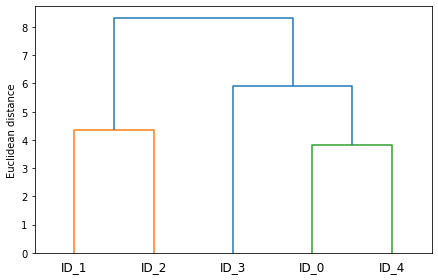

In [15]:
from scipy.cluster.hierarchy import dendrogram

row_dendr = dendrogram(row_clusters, labels = labels)
plt.tight_layout()
plt.ylabel('Euclidean distance')
plt.show()

##### 히트맵에 덴드로그램 적용
1. add_axes 메소드를 사용해 덴드로그램의 x축 위치, y축 위치, 너비, 높이 지정 -> 덴드로그램 반시계 90도 회전

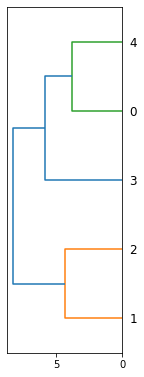

In [16]:
fig = plt.figure(figsize = (8, 8), facecolor = 'white')
axd = fig.add_axes([0.09, 0.1, 0.2, 0.6])
row_dendr = dendrogram(row_clusters, orientation = 'left')

2. 덴드로그램 객체의 leaves 키에서 얻은 클러스터 레이블을 따라 원본 df에 있는 데이터 재정렬

In [17]:
df_rowclust = df.iloc[row_dendr['leaves'][::-1]]

In [18]:
axm = fig.add_axes([0.23, 0.1, 0.6, 0.6])
cax = axm.matshow(df_rowclust, interpolation = 'nearest', cmap = 'hot_r')

axd.set_xticks([])
axd.set_yticks([])
for i in axd.spines.values():
    i.set_visible(False)
fig.colorbar(cax)
axm.set_xticklabels([''] + list(df_rowclust.columns))
axm.set_yticklabels([''] + list(df_rowclust.index))
plt.show()

# sklearn 병합 군집

In [19]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=3,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 레이블: ', labels)

클러스터 레이블:  [1 0 0 2 1]


In [20]:
from sklearn.cluster import AgglomerativeClustering
ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
labels = ac.fit_predict(X)
print('클러스터 레이블: ', labels)

클러스터 레이블:  [0 1 1 0 0]


# DBSCAN (Density-Based Spatial clustering of applications with noise)
- k평균처럼 원형 클러스터를 가정하지 않는다.
- 임계치를 수동으로 지정해야 하는 계층적인 방식으로 데이터셋을 나누지 않는다.
- 샘플이 조밀하게 모인 지역에 클러스터 레이블을 할당한다.
- 밀집도란 특정 반경 theta 안에 있는 샘플 개수로 정한다.

  1. 조건
- 어떤 샘플의 반경 theta안에 있는 이웃 샘플이 지정된 개수 (MinPts) 이상이면 핵심 샘플이 된다.
- theta 이내에 MinPts보다 이웃이 적지만 다른 핵심 샘플의 반경 theta 안에 있으면 경계 샘플이 된다.
- 핵심 샘플과 경계 샘플이 아닌 다른 모든 샘플은 잡음 샘플이 된다.

  2. 과정
  
    (1) 개별 핵심 샘플이나 핵심 샘플의 그룹을 클러스터로 만든다.  
    (2) 경계 샘플을 해당 핵심 샘플의 클러스터에 할당한다.  

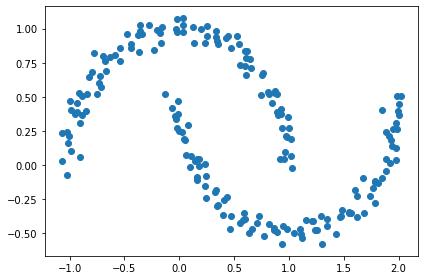

In [21]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples = 200, noise = 0.05, random_state = 0)
plt.scatter(X[:, 0], X[:, 1])
plt.tight_layout()
plt.show()

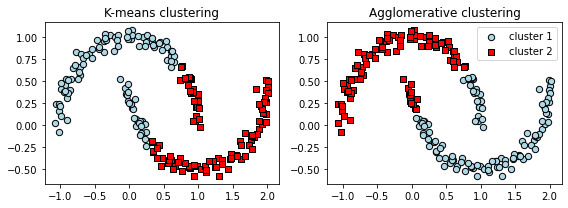

In [24]:
f, (ax1, ax2) = plt.subplots(1, 2, figsize = (8, 3))
km = KMeans(n_clusters = 2,
            random_state = 0)
y_km = km.fit_predict(X)

ax1.scatter(X[y_km == 0, 0],
            X[y_km == 0, 1],
            s = 40, c = 'lightblue',
            marker = 'o', edgecolor = 'black',
            label = 'cluster 1')
ax1.scatter(X[y_km == 1, 0],
            X[y_km == 1, 1],
            s = 40, c = 'red',
            marker = 's', edgecolor = 'black',
            label = 'cluster 2')
ax1.set_title('K-means clustering')

ac = AgglomerativeClustering(n_clusters=2,
                             affinity='euclidean',
                             linkage='complete')
y_ac = ac.fit_predict(X)
ax2.scatter(X[y_ac == 0, 0],
            X[y_ac == 0, 1],
            s = 40, c = 'lightblue',
            marker = 'o', edgecolor = 'black',
            label = 'cluster 1')
ax2.scatter(X[y_ac == 1, 0],
            X[y_ac == 1, 1],
            s = 40, c = 'red',
            marker = 's', edgecolor = 'black',
            label = 'cluster 2')
ax2.set_title('Agglomerative clustering')
plt.legend()
plt.tight_layout()
plt.show()

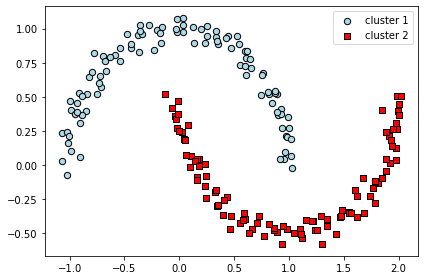

In [26]:
from sklearn.cluster import DBSCAN
db = DBSCAN(eps = 0.2,
            min_samples = 5,
            metric = 'euclidean')
y_db = db.fit_predict(X)
plt.scatter(X[y_db == 0, 0],
            X[y_db == 0, 1],
            s = 40, c = 'lightblue',
            marker = 'o', edgecolor = 'black',
            label = 'cluster 1')
plt.scatter(X[y_db == 1, 0],
            X[y_db == 1, 1],
            s = 40, c = 'red',
            marker = 's', edgecolor = 'black',
            label = 'cluster 2')
plt.legend()
plt.tight_layout()
plt.show()

##### DBSCAN 단점
- 훈련 샘플 개수가 고정되어 있다 가정하고 특성 개수가 늘어나면 차원의 저주로 인해 역효과
- 유클리디안 측정 사용하는 군집 알고리즘은에 영향
- 그래프 기반 군집 (graph-based clustering)에 spectral clustering이 유명하다.


결과를 평가할 때, 차원 축소 기법을 적용해 클러스터를 시각화하고 레이블을 할당하여 결과 평가에도 도움된다.